# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

#Sort data and set rest the index
combined_data = combined_data.sort_values(['Timepoint','Metastatic Sites'], ascending = [True, False]).reset_index(drop = True)


# Display the data table for preview
combined_data.head()
# combined_data.count()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [165]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [166]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_ids = duplicate['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [167]:
# Optional: Get all the data for the duplicate mouse ID. 
value = duplicate_ids[0]
duplicate_data = combined_data.loc[combined_data['Mouse ID'] == value]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
108,g989,0,45.000000,0,Propriva,Female,21,26
389,g989,5,48.786801,0,Propriva,Female,21,26
390,g989,5,47.570392,0,Propriva,Female,21,26
646,g989,10,51.745156,0,Propriva,Female,21,26
647,g989,10,49.880528,0,Propriva,Female,21,26
782,g989,15,51.325852,1,Propriva,Female,21,26
872,g989,15,53.442020,0,Propriva,Female,21,26
1002,g989,20,55.326122,1,Propriva,Female,21,26
1003,g989,20,54.657650,1,Propriva,Female,21,26


In [168]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = combined_data.loc[combined_data['Mouse ID'] != value]
cleaned.head()
# cleaned.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [169]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_Tumor_Volume = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()).rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
Median_Tumor_Volume = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()).rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
Tumor_Volume_Variance = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()).rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
Tumor_Volume_std = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()).rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev'})
Tumor_Volume_sem = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()).rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})

summary_statistics = pd.merge(Mean_Tumor_Volume, Median_Tumor_Volume, how="inner", on=['Drug Regimen'])
summary_statistics = pd.merge(summary_statistics, Tumor_Volume_Variance, how="inner", on=['Drug Regimen'])
summary_statistics = pd.merge(summary_statistics, Tumor_Volume_std, how="inner", on=['Drug Regimen'])
summary_statistics = pd.merge(summary_statistics, Tumor_Volume_sem, how="inner", on=['Drug Regimen'])


summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [171]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_statistics = cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(['mean','median','var', 'std', 'sem'])
aggregated_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

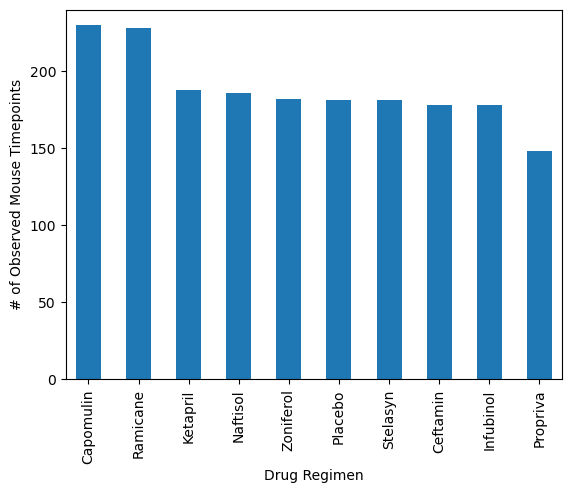

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#I verified that the Mouse ID and Timepoint returned the same value so just used Mouse ID
drug_mouse = pd.DataFrame(cleaned.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False))


#define bar graph in Pandas
pandaplot = drug_mouse.plot.bar(rot=89, color='tab:blue',legend=False)

#Set xticks, labels, and adjust size of plot area
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlim(-0.45, len(drug_regimen)-0.55)
plt.ylim(0, max(mouse_timepoints) + 10)

#Showtime
plt.show()

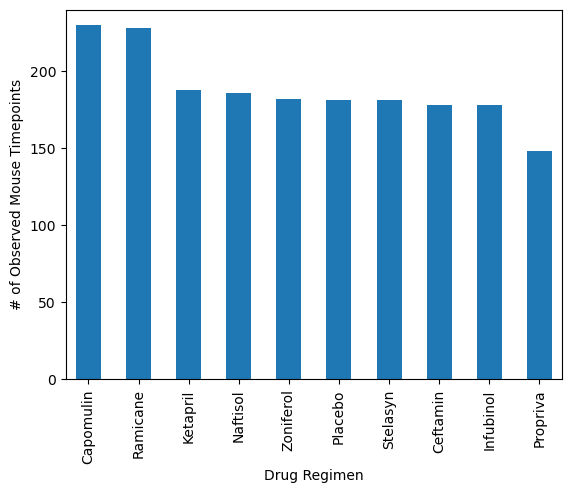

In [173]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#get x and y axis in list form
drug_regimen = list(drug_mouse.index.values)
mouse_timepoints = list(drug_mouse['Mouse ID'])

#define bar graph in pyplot
plt.bar(drug_regimen, mouse_timepoints, color='tab:blue', alpha=1, align="center", width=0.5)

#Set xticks, labels, and adjust size of plot area
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlim(-0.45, len(drug_regimen)-0.55)
plt.ylim(0, max(mouse_timepoints) + 10)

#Showtime
plt.show()

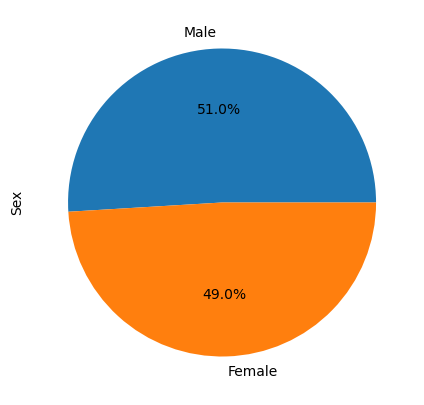

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#define dataframe and pie chart using Pandas
pandapie = pd.DataFrame(cleaned['Sex'].value_counts())
pandapie = pandapie.plot.pie(y='Sex', figsize=(5, 5), legend=False, autopct='%1.1f%%')



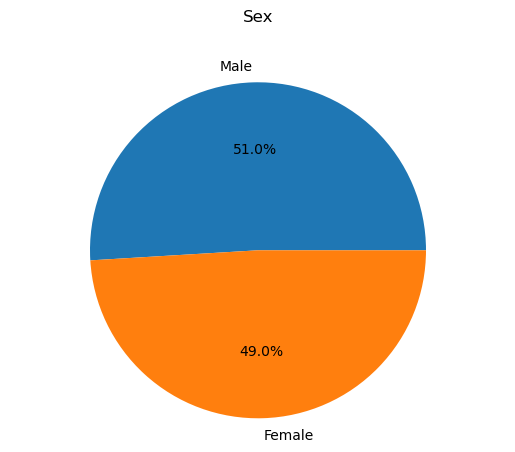

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#calculate the number of male and female mice. num_mice is the total from above
sex_counts = cleaned['Sex'].value_counts()
male_percent = sex_counts[0]/num_mice *100
Female = sex_counts[1]/num_mice *100
sizes = [male_percent, Female]
labels = ['Male', 'Female']
plt.title('Sex',pad=32)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
#Showtime
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


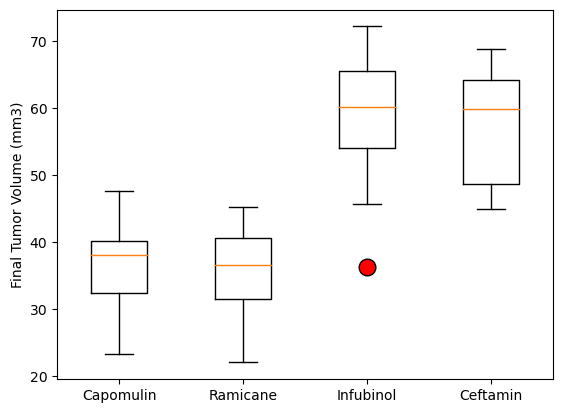

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

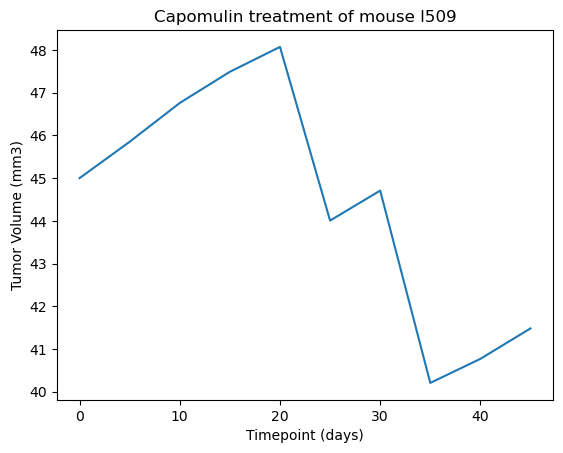

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


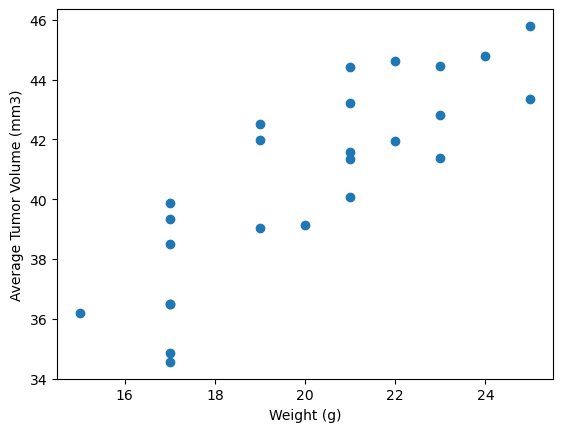

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


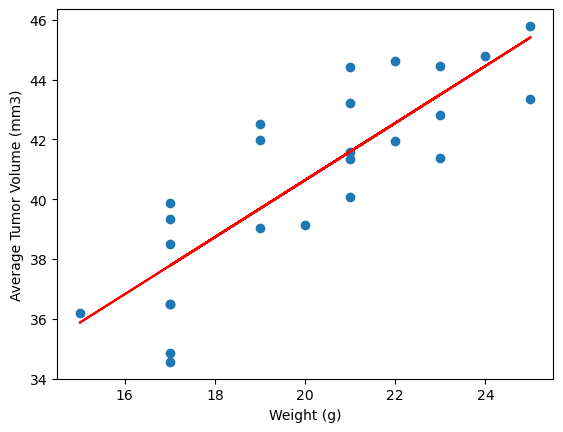

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
